In [655]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [656]:
hrtrain = pd.read_csv('train_LZdllcl.csv')

In [657]:
hrtest = pd.read_csv('test_2umaH9m.csv')

In [658]:
hrtrain.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [659]:
hrtrain.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.0,5,0,0,49,0


In [660]:
hrtrain.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [661]:
hrtrain.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [662]:
hrtrain.shape

(54808, 14)

In [663]:
hrtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [664]:
hrtrain.avg_training_score.describe()

count    54808.000000
mean        63.386750
std         13.371559
min         39.000000
25%         51.000000
50%         60.000000
75%         76.000000
max         99.000000
Name: avg_training_score, dtype: float64

In [665]:
hrtrain.age.describe()

count    54808.000000
mean        34.803915
std          7.660169
min         20.000000
25%         29.000000
50%         33.000000
75%         39.000000
max         60.000000
Name: age, dtype: float64

In [666]:
print(hrtrain.age.skew())
print(hrtrain.age.kurt())

1.0074317710382241
0.7923533691940756


In [667]:
print(hrtrain.avg_training_score.skew())
print(hrtrain.avg_training_score.kurt())

0.45190808551707995
-1.049649301934108


<AxesSubplot:ylabel='Frequency'>

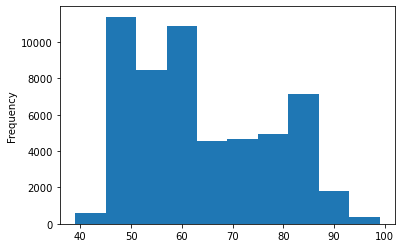

In [668]:
hrtrain.avg_training_score.plot(kind='hist')

<AxesSubplot:>

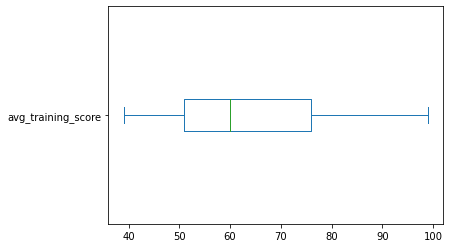

In [669]:
hrtrain.avg_training_score.plot(kind='box',vert=False)

<AxesSubplot:ylabel='Density'>

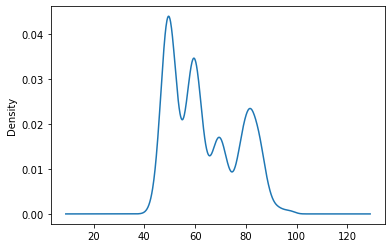

In [670]:
hrtrain.avg_training_score.plot(kind='density')

In [671]:
hrtrain[['age','avg_training_score']].cov()

,age,avg_training_score
age,58.678192,-4.955455
avg_training_score,-4.955455,178.798603


In [672]:
hrtrain[['age','avg_training_score']].corr()

,age,avg_training_score
age,1.00000,-0.04838
avg_training_score,-0.04838,1.00000


<AxesSubplot:xlabel='age', ylabel='avg_training_score'>

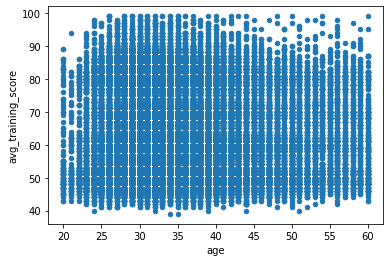

In [673]:
hrtrain.plot(x='age',y='avg_training_score',kind='scatter')

In [674]:
hrtrain.education.value_counts(dropna=False)

Bachelor's          36669
Master's & above    14925
NaN                  2409
Below Secondary       805
Name: education, dtype: int64

In [675]:
hrtrain.gender.value_counts(dropna=False)

m    38496
f    16312
Name: gender, dtype: int64

In [676]:
hrtrain.department.value_counts(dropna=False)

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [677]:
pd.crosstab(hrtrain.department,hrtrain.gender)   #cross tabulation

gender,f,m
department,,
Analytics,513,4839
Finance,681,1855
HR,1006,1412
Legal,149,890
Operations,4677,6671
Procurement,3287,3851
R&D,57,942
Sales & Marketing,3154,13686
Technology,2788,4350


In [678]:
pd.crosstab(hrtrain.department,hrtrain.education)   #cross tabulation

education,Bachelor's,Below Secondary,Master's & above
department,,,
Analytics,3978,0,1037
Finance,1895,106,499
HR,1525,128,733
Legal,814,65,156
Operations,7781,176,3165
Procurement,4393,129,2544
R&D,542,0,429
Sales & Marketing,11099,0,4166
Technology,4642,201,2196


In [679]:
hrtrain.previous_year_rating.value_counts(dropna=False)

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
NaN     4124
Name: previous_year_rating, dtype: int64

In [680]:
pd.crosstab(hrtrain.previous_year_rating,hrtrain.gender)   #cross tabulation

gender,f,m
previous_year_rating,,
1.0,1661,4562
2.0,1221,3004
3.0,5633,12985
4.0,3037,6840
5.0,3602,8139


In [681]:
hrtrain.avg_training_score.groupby(hrtrain.gender).mean()

gender
f    63.889897
m    63.173550
Name: avg_training_score, dtype: float64

In [682]:
hrtrain.age.groupby(hrtrain.gender).median()

gender
f    33.0
m    33.0
Name: age, dtype: float64

In [683]:
hrtrain.avg_training_score.groupby(hrtrain.previous_year_rating).mean()

previous_year_rating
1.0    60.064760
2.0    61.924024
3.0    64.197819
4.0    64.119773
5.0    63.781364
Name: avg_training_score, dtype: float64

In [684]:
hrtrain.length_of_service.groupby(hrtrain.previous_year_rating).mean()

previous_year_rating
1.0    6.223686
2.0    6.241893
3.0    6.309324
4.0    6.193986
5.0    6.269142
Name: length_of_service, dtype: float64

In [685]:
hrtrain.is_promoted.value_counts(dropna=False)

0    50140
1     4668
Name: is_promoted, dtype: int64

In [686]:
hrtrain.avg_training_score.groupby(hrtrain.is_promoted).mean()

is_promoted
0    62.647686
1    71.325193
Name: avg_training_score, dtype: float64

In [687]:
hrtrain.length_of_service.groupby(hrtrain.is_promoted).mean()

is_promoted
0    5.879398
1    5.716367
Name: length_of_service, dtype: float64

In [688]:
hrtrain.avg_training_score.groupby([hrtrain.is_promoted,hrtrain.gender]).mean()

is_promoted  gender
0            f         63.089256
             m         62.461963
1            f         71.991820
             m         71.019681
Name: avg_training_score, dtype: float64

In [689]:
hrtrain.length_of_service.groupby([hrtrain['awards_won?'],hrtrain.is_promoted]).mean()

awards_won?  is_promoted
0            0              5.896963
             1              5.828912
1            0              4.658228
             1              4.889088
Name: length_of_service, dtype: float64

In [690]:
hrtrain.no_of_trainings.groupby(hrtrain.recruitment_channel).median()

recruitment_channel
other       1.0
referred    1.0
sourcing    1.0
Name: no_of_trainings, dtype: float64

In [691]:
pd.crosstab(hrtrain.gender,hrtrain.is_promoted)   

is_promoted,0,1
gender,,
f,14845,1467
m,35295,3201


In [692]:
pd.crosstab(hrtrain.gender,hrtrain.is_promoted,normalize=True)

is_promoted,0,1
gender,,
f,0.270855,0.026766
m,0.643975,0.058404


In [693]:
np.round(pd.crosstab(hrtrain.department,hrtrain.is_promoted,margins=True,normalize='index'),decimals=2)*100

is_promoted,0,1
department,,
Analytics,90.0,10.0
Finance,92.0,8.0
HR,94.0,6.0
Legal,95.0,5.0
Operations,91.0,9.0
Procurement,90.0,10.0
R&D,93.0,7.0
Sales & Marketing,93.0,7.0
Technology,89.0,11.0


<AxesSubplot:xlabel='department'>

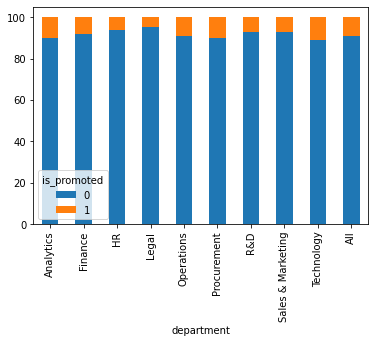

In [694]:
(np.round(pd.crosstab(hrtrain.department,hrtrain.is_promoted,margins=True,normalize='index'),decimals=2)*100).plot(kind='bar',stacked=True)

In [695]:
hrtrain.avg_training_score.describe()

count    54808.000000
mean        63.386750
std         13.371559
min         39.000000
25%         51.000000
50%         60.000000
75%         76.000000
max         99.000000
Name: avg_training_score, dtype: float64

In [696]:
pd.cut(np.array(hrtrain.avg_training_score),3,labels=['Bad','Average','Good']).value_counts()

Bad        25868
Average    18416
Good       10524
dtype: int64

In [697]:
bins=[29,39,49,59,69,79,89,99]
hrtrain['bins']=pd.cut(hrtrain.avg_training_score,bins)

In [698]:
hrtrain.bins.value_counts().sort_index()

(29, 39]        2
(39, 49]     9285
(49, 59]    16581
(59, 69]    11073
(69, 79]     7343
(79, 89]     9760
(89, 99]      764
Name: bins, dtype: int64

In [699]:
bins=[0,5,10,15,20,25,30,35,40]
hrtrain['bins']=pd.cut(hrtrain.length_of_service,bins)
hrtrain.bins.value_counts().sort_index()

(0, 5]      30932
(5, 10]     17990
(10, 15]     3539
(15, 20]     1829
(20, 25]      325
(25, 30]      149
(30, 35]       43
(35, 40]        1
Name: bins, dtype: int64

In [700]:
hrtrain.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted', 'bins'],
      dtype='object')

In [701]:
hrtrain[['no_of_trainings', 'age','length_of_service','avg_training_score']].cov()

,no_of_trainings,age,length_of_service,avg_training_score
no_of_trainings,0.371203,-0.379329,-0.148832,0.346378
age,-0.379329,58.678192,21.468711,-4.955455
length_of_service,-0.148832,21.468711,18.191028,-2.174143
avg_training_score,0.346378,-4.955455,-2.174143,178.798603


In [702]:
hrtrain[['no_of_trainings', 'age','length_of_service','avg_training_score']].corr()

,no_of_trainings,age,length_of_service,avg_training_score
no_of_trainings,1.000000,-0.081278,-0.057275,0.042517
age,-0.081278,1.000000,0.657111,-0.048380
length_of_service,-0.057275,0.657111,1.000000,-0.038122
avg_training_score,0.042517,-0.048380,-0.038122,1.000000


In [703]:
import seaborn as sns

<AxesSubplot:>

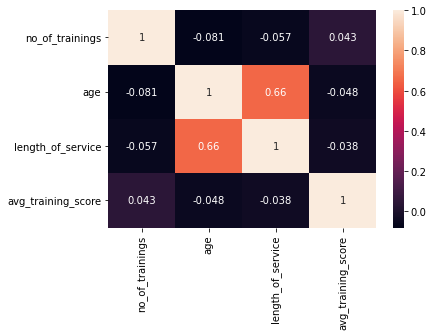

In [704]:
sns.heatmap(hrtrain[['no_of_trainings', 'age','length_of_service','avg_training_score']].corr(),annot=True)

In [705]:
hrtrain.avg_training_score.groupby(hrtrain.is_promoted).mean()

is_promoted
0    62.647686
1    71.325193
Name: avg_training_score, dtype: float64

In [706]:
hrtrain.length_of_service.groupby(hrtrain.is_promoted).mean()

is_promoted
0    5.879398
1    5.716367
Name: length_of_service, dtype: float64

In [707]:
hrtrain.avg_training_score.groupby(hrtrain['awards_won?']).mean()      #what is the avg_training score of awards_won? 0 or 1 ?

awards_won?
0    63.238186
1    69.649606
Name: avg_training_score, dtype: float64

In [708]:
hrtrain.avg_training_score.groupby([hrtrain['awards_won?'],hrtrain['KPIs_met >80%']]).mean()    #2 categorical variables in group by

awards_won?  KPIs_met >80%
0            0                62.507213
             1                64.626963
1            0                71.126984
             1                68.863691
Name: avg_training_score, dtype: float64

In [709]:
hrtrain.isnull().sum().sort_values(ascending=False)

previous_year_rating    4124
education               2409
employee_id                0
department                 0
region                     0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
bins                       0
dtype: int64

In [710]:
hrtest.isnull().sum().sort_values(ascending=False)

previous_year_rating    1812
education               1034
employee_id                0
department                 0
region                     0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [711]:
# reimport train data as the earlier data had new variables
hrtrain = pd.read_csv('train_LZdllcl.csv')

In [712]:
hrtest = pd.read_csv('test_2umaH9m.csv')

In [713]:
hrtest['is_promoted']='test'# adding dependent variable to test data for row concatenation

In [714]:
combinedf=pd.concat([hrtrain,hrtest],axis=0) #row wise concatenation

In [715]:
combinedf.shape


(78298, 14)

In [716]:
combinedf.education.value_counts(dropna=False)

Bachelor's          52247
Master's & above    21429
NaN                  3443
Below Secondary      1179
Name: education, dtype: int64

In [717]:
# impute missing values in education variable with the word "Bachelor's". because NA's are only 4.4% 
#and Bachelors is very large segment,there will be no effect on data pattern/trend
combinedf.education=combinedf.education.fillna("Bachelor's")

In [718]:
combinedf.previous_year_rating.value_counts(dropna=False)

3.0    26539
5.0    16838
4.0    14126
1.0     8903
2.0     5956
NaN     5936
Name: previous_year_rating, dtype: int64

In [719]:
combinedf.previous_year_rating=combinedf.previous_year_rating.fillna(3.0)
# impute with 3.0 rating as it is the largest segment and missing values are few

In [720]:
# for dummy encoding or label encoding we must split data into numeric and oject columns
numericcols=combinedf.select_dtypes(include=np.number) # np.number will consider both int64 and float 64
objectcols=combinedf.select_dtypes(include=['object']) # object columns


In [721]:
print(numericcols.shape)
print(objectcols.shape)

(78298, 8)
(78298, 6)


In [722]:
numericcols.columns #all numeric data will not be numeric they might be representing categories
# 'previous_year_rating'(1-5),'KPIs_met >80%', 'awards_won?'- 0 is no and 1 is yes

Index(['employee_id', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

In [723]:
numericcols['KPIs_met >80%'].value_counts()

0    50578
1    27720
Name: KPIs_met >80%, dtype: int64

In [724]:
numericcols['awards_won?'].value_counts()

0    76493
1     1805
Name: awards_won?, dtype: int64

In [725]:
objectcols['previous_year_rating']=numericcols['previous_year_rating']
objectcols['KPIs_met >80%']=numericcols['KPIs_met >80%']
objectcols['awards_won?']=numericcols['awards_won?']
# add categorical cols from numeric cols to object cols

In [726]:
numericcols=numericcols.drop(['previous_year_rating','KPIs_met >80%','awards_won?'],axis=1)
#drop categorical cols from numeric cols. aixs=1 is column dropping

In [727]:
numericcols['is_promoted']=objectcols.is_promoted

In [728]:
objectcols=objectcols.drop('is_promoted',axis=1)

In [729]:
print(numericcols.shape)
print(objectcols.shape)

(78298, 6)
(78298, 8)


In [730]:
objectcols.head(3)

,department,region,education,gender,recruitment_channel,previous_year_rating,KPIs_met >80%,awards_won?
0,Sales & Marketing,region_7,Master's & above,f,sourcing,5.0,1,0
1,Operations,region_22,Bachelor's,m,other,5.0,0,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,3.0,0,0


In [731]:
from sklearn.preprocessing import LabelEncoder

In [732]:
le=LabelEncoder()

In [733]:
objectcolsdummy=objectcols.apply(le.fit_transform)

In [734]:
objectcolsdummy.head(3)

,department,region,education,gender,recruitment_channel,previous_year_rating,KPIs_met >80%,awards_won?
0,7,31,2,0,2,4,1,0
1,4,14,0,1,0,4,0,0
2,7,10,0,1,2,2,0,0


In [735]:
# concat both dataframes numeric and object into one
combinedf_clean=pd.concat([numericcols,objectcolsdummy],axis=1)

In [736]:
# split back to traindata and testdata
hrtraindf=combinedf_clean[combinedf_clean.is_promoted!='test']
hrtestdf=combinedf_clean[combinedf_clean.is_promoted=='test']

In [737]:
hrtestdf=hrtestdf.drop('is_promoted',axis=1)

In [738]:
hrtraindf.is_promoted.value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [739]:
#test null average avg_training_score of is_promoted 0&1 equal?
hrtraindf.avg_training_score.groupby(hrtraindf.is_promoted).mean()

is_promoted
0    62.647686
1    71.325193
Name: avg_training_score, dtype: float64

In [740]:
# since there are exactly 2 variables in categorical variable - 2 sample independent t test
# Null - There is no significant difference in average avg_training_score of is_promoted 0&1
# Alt - There is significant difference in average avg_training_score of is_promoted 0&1

In [741]:
promotedyes=hrtraindf[hrtraindf.is_promoted==1]
promotedno=hrtraindf[hrtraindf.is_promoted==0]

In [742]:
from scipy.stats import ttest_ind

In [743]:
ttest_ind(promotedyes.avg_training_score,promotedno.avg_training_score,equal_var=False)

Ttest_indResult(statistic=38.82675007357188, pvalue=7.662329172468838e-291)

In [744]:
#since p-value < 0.05 , reject null

In [745]:
# test null the average length_of_service of is_promoted 0 & 1 equal?

In [746]:
hrtraindf.length_of_service.groupby(hrtraindf.is_promoted).mean()

is_promoted
0    5.879398
1    5.716367
Name: length_of_service, dtype: float64

In [747]:
hrtraindf.length_of_service.groupby(hrtraindf.is_promoted).var()

is_promoted
0    18.387278
1    16.062239
Name: length_of_service, dtype: float64

In [748]:
# Null - There is no significant difference in average length_of_service of is_promoted 0&1
# Alt - There is significant difference in average length_of_service of is_promoted 0&1
ttest_ind(promotedyes.length_of_service,promotedno.length_of_service,equal_var=False)

Ttest_indResult(statistic=-2.6420549711884886, pvalue=0.008262946987836755)

In [749]:
#since p-value < 0.05 , reject null

In [750]:
# test null the average the avg_training_score for different recruitment_channel is equal ?
hrtraindf.avg_training_score.groupby(hrtraindf.recruitment_channel).mean()

recruitment_channel
0    63.362839
1    66.182137
2    63.280620
Name: avg_training_score, dtype: float64

In [751]:
# Null - There is no significant difference in average avg_training_score of recruitment_channel
# Alt - There is significant difference in average avg_training_score of recruitment_channel

In [752]:
other=hrtraindf[hrtraindf.recruitment_channel==0]
refer=hrtraindf[hrtraindf.recruitment_channel==1]
source=hrtraindf[hrtraindf.recruitment_channel==2]

In [753]:
from scipy.stats import f_oneway

In [754]:
f_oneway(other.avg_training_score,refer.avg_training_score,source.avg_training_score)

F_onewayResult(statistic=25.758203095600134, pvalue=6.585805990029605e-12)

In [755]:
#since p-value < 0.05 , reject null

In [756]:
# # test null the average length_of_service of different recruitment channels is equal?

In [757]:
hrtraindf.length_of_service.groupby(hrtraindf.recruitment_channel).mean()

recruitment_channel
0    5.892991
1    4.979860
2    5.873040
Name: length_of_service, dtype: float64

In [758]:
# Null - There is no significant difference in average length_of_service of recruitment_channel
# Alt - There is significant difference in average length_of_service of recruitment_channel
f_oneway(other.length_of_service,refer.length_of_service,source.length_of_service)

F_onewayResult(statistic=25.31146884827052, pvalue=1.0290643395315436e-11)

In [759]:
#since p-value < 0.05 , reject null

In [760]:
# test null no association between gender and is_promoted?
pd.crosstab(hrtraindf.gender,hrtraindf.is_promoted)

is_promoted,0,1
gender,,
0,14845,1467
1,35295,3201


In [761]:
#Null- There is no association between both variables
#Alt - There is association between both variables

In [762]:
from scipy.stats import chi2_contingency

In [763]:
chi2_contingency(pd.crosstab(hrtraindf.gender,hrtraindf.is_promoted))

(6.677254566546107,
 0.009765091521176657,
 1,
 array([[14922.70617428,  1389.29382572],
        [35217.29382572,  3278.70617428]]))

In [764]:
# since p value < 0.05 reject null

In [765]:
hrtraindf.columns

Index(['employee_id', 'no_of_trainings', 'age', 'length_of_service',
       'avg_training_score', 'is_promoted', 'department', 'region',
       'education', 'gender', 'recruitment_channel', 'previous_year_rating',
       'KPIs_met >80%', 'awards_won?'],
      dtype='object')

In [766]:
y=hrtraindf.is_promoted
X=hrtraindf.drop(['employee_id','is_promoted'],axis=1)

In [767]:
y=le.fit_transform(y)   # label encode dependent variable

In [768]:
from sklearn.linear_model import LogisticRegression

In [769]:
logit=LogisticRegression(max_iter=2000)

In [770]:
logitmodel=logit.fit(X,y)

In [771]:
logitmodel.score(X,y)    # accuracy from confusion matrix

0.9172566048752007

In [772]:
logitpredict=logitmodel.predict(X)

In [773]:
pd.crosstab(y,logitpredict)

col_0,0,1
row_0,,
0,49947,193
1,4342,326


In [774]:
(49947+326)/(49947+326+193+4342)   # accuracy

0.9172566048752007

In [775]:
from sklearn.metrics import classification_report

In [776]:
print(classification_report(y,logitpredict))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     50140
           1       0.63      0.07      0.13      4668

    accuracy                           0.92     54808
   macro avg       0.77      0.53      0.54     54808
weighted avg       0.90      0.92      0.89     54808



In [777]:
from sklearn.tree import DecisionTreeClassifier

In [778]:
tree=DecisionTreeClassifier(max_depth=8)

In [779]:
treemodel=tree.fit(X,y)

In [780]:
treemodel.score(X,y)    

0.9350824697124508

In [781]:
from sklearn.model_selection import cross_val_score

In [782]:
cross_val_score(tree,X,y,cv=5)  # cross validation - repeated testing of model with same data 

array([0.93340631, 0.93121693, 0.93167305, 0.9338564 , 0.93203175])

In [783]:
from sklearn.tree import export_graphviz,plot_tree

[Text(0.5, 0.875, 'avg_training_score <= 90.5\ngini = 0.156\nsamples = 54808\nvalue = [50140, 4668]'),
 Text(0.25, 0.625, 'KPIs_met >80% <= 0.5\ngini = 0.142\nsamples = 54229\nvalue = [50069, 4160]'),
 Text(0.125, 0.375, 'awards_won? <= 0.5\ngini = 0.067\nsamples = 35295\nvalue = [34064, 1231]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'avg_training_score <= 88.5\ngini = 0.262\nsamples = 18934\nvalue = [16005, 2929]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'department <= 0.5\ngini = 0.215\nsamples = 579\nvalue = [71, 508]'),
 Text(0.625, 0.375, 'avg_training_score <= 93.5\ngini = 0.499\nsamples = 116\nvalue = [56, 60]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'avg_training_score <= 92.5\ngini = 0.063\nsamples = 463\nvalue = [15, 448]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

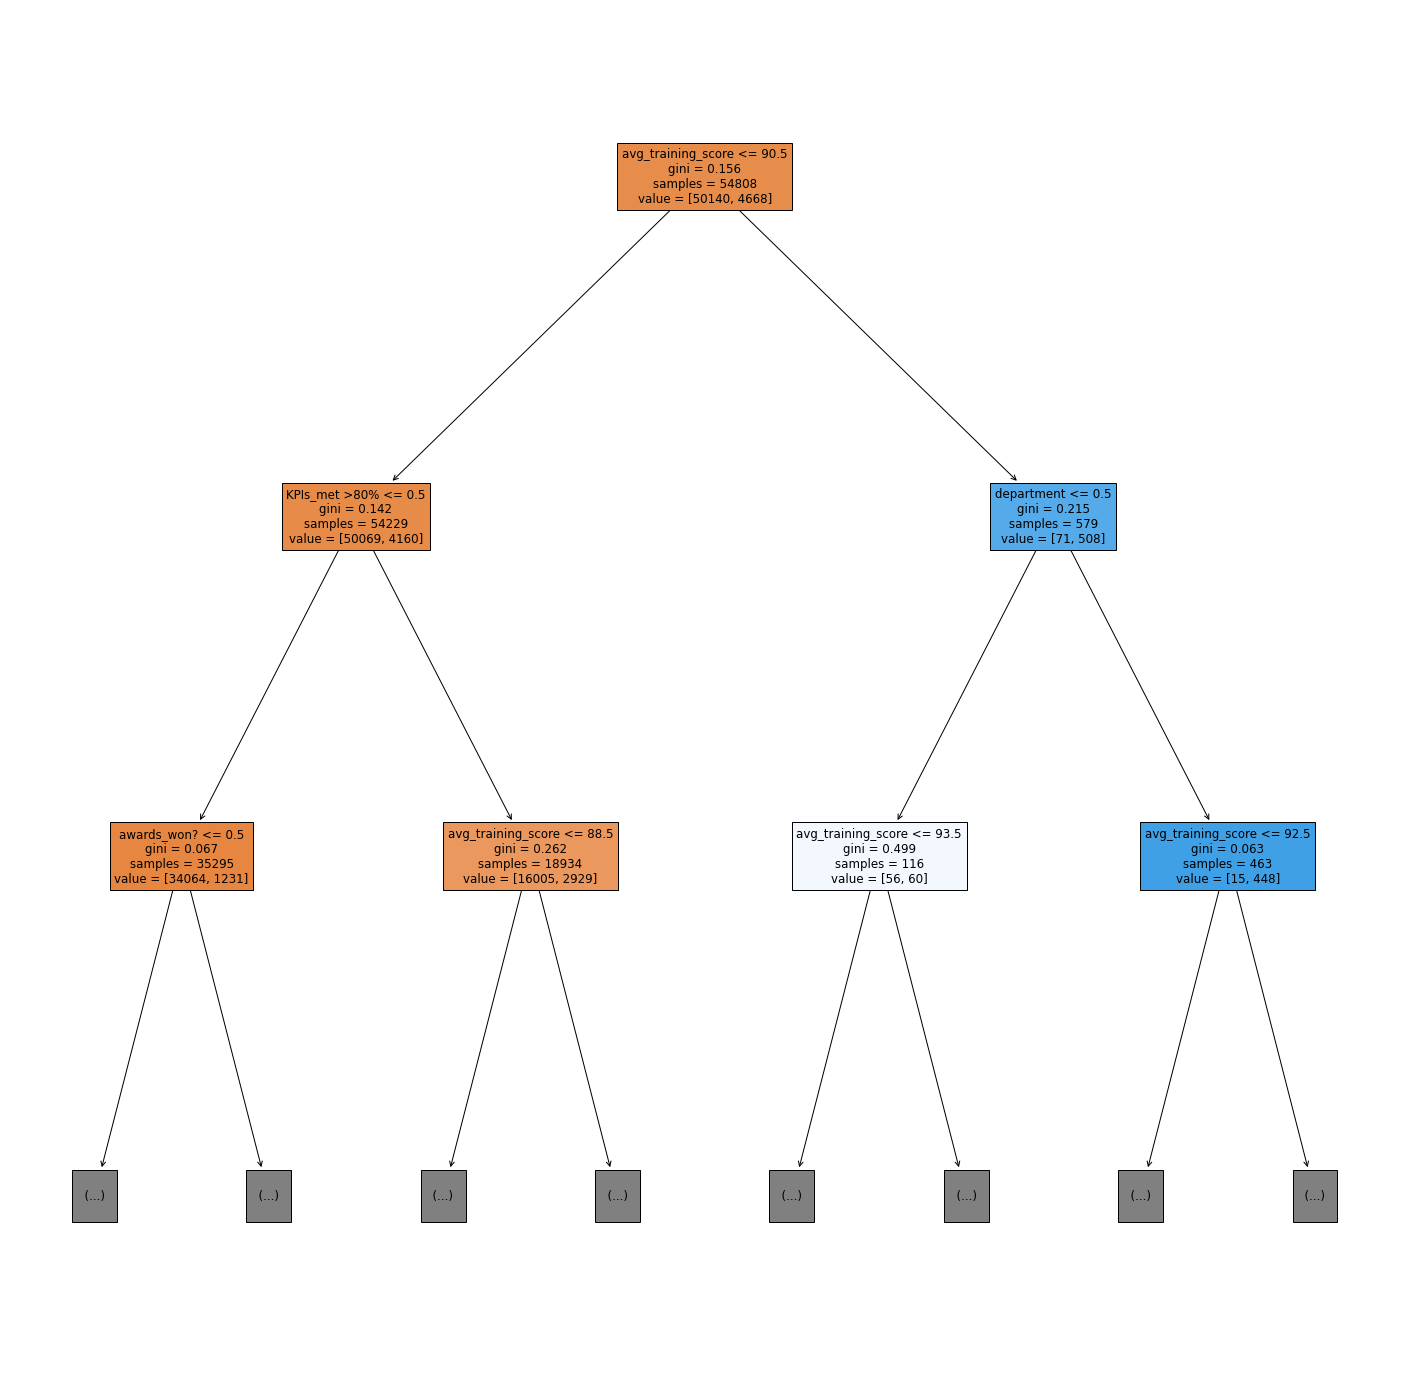

In [784]:
plt.figure(figsize=(25,25))
plot_tree(treemodel,max_depth=2,filled=True,feature_names=X.columns)

In [785]:
pd.DataFrame(X.columns,treemodel.feature_importances_).sort_index(ascending=False)

,0
0.435000,avg_training_score
0.266449,department
0.135236,KPIs_met >80%
0.071425,awards_won?
0.047434,previous_year_rating
0.012429,age
0.011774,length_of_service
0.009592,region
0.005821,no_of_trainings
0.002322,gender


In [786]:
from sklearn.ensemble import RandomForestClassifier  

In [787]:
RF=RandomForestClassifier(n_estimators=1000)  

In [788]:
RFmodel=RF.fit(X,y)

In [789]:
RFmodel.score(X,y)

0.999744562837542

In [790]:
cross_val_score(RF,X,y)

array([0.93650794, 0.93304142, 0.93395366, 0.93540735, 0.933309  ])

In [791]:
from sklearn.tree import _tree
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
   
    def recurse(node, path, paths):
       
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 3)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 3)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
           
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
   
    rules = []
    for path in paths:
        rule = "if "
       
        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " then "
        if class_names is None:
            rule += "response: "+str(np.round(path[-1][0][0][0],3))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),2)}%)"
        rule += f" | based on {path[-1][1]:,} samples"
        rules += [rule]
       
    return rules


In [792]:
rules = get_rules(tree,X.columns,y)
for r in rules:
    print(r)

if (avg_training_score <= 90.5) and (KPIs_met >80% <= 0.5) and (awards_won? <= 0.5) and (previous_year_rating <= 3.5) and (avg_training_score <= 59.5) and (avg_training_score <= 57.5) and (avg_training_score <= 54.5) then class: 0 (proba: 100.0%) | based on 11,658 samples
if (avg_training_score <= 90.5) and (KPIs_met >80% <= 0.5) and (awards_won? <= 0.5) and (previous_year_rating <= 3.5) and (avg_training_score > 59.5) and (avg_training_score <= 87.5) and (department <= 7.5) and (department <= 6.5) then class: 0 (proba: 97.1%) | based on 10,629 samples
if (avg_training_score <= 90.5) and (KPIs_met >80% > 0.5) and (avg_training_score <= 88.5) and (awards_won? <= 0.5) and (department > 4.5) and (length_of_service <= 7.5) and (previous_year_rating > 1.5) and (age <= 40.5) then class: 0 (proba: 82.7%) | based on 5,799 samples
if (avg_training_score <= 90.5) and (KPIs_met >80% > 0.5) and (avg_training_score <= 88.5) and (awards_won? <= 0.5) and (department <= 4.5) and (region <= 12.5) and (

In [793]:
hrtestdf=hrtestdf.drop('employee_id',axis=1)

In [794]:
# Predict on test data
hrlogitpredict=logitmodel.predict(hrtestdf)

In [795]:
pd.DataFrame(hrlogitpredict).to_csv('logistic.csv')

In [796]:
dectreepredict=treemodel.predict(hrtestdf)

In [797]:
pd.DataFrame(dectreepredict).to_csv('dectree.csv')

In [798]:
RFpredict=RFmodel.predict(hrtestdf)

In [799]:
pd.DataFrame(RFpredict).to_csv('RF.csv')

In [800]:
# AV HR analytics submission scores
# logistic regression - 0.11415
# Decision tree - 0.33503
# Random forest - 0.41030
# Gradient Boosting -  0.48110
# XGBOOST - 0.48124

In [801]:
from sklearn.ensemble import GradientBoostingClassifier

In [802]:
gbm=GradientBoostingClassifier(n_estimators=1000)

In [803]:
gbmmodel=gbm.fit(X,y)

In [804]:
gbmmodel.score(X,y)

0.9449350459786893

In [805]:
gbmpredict=gbmmodel.predict(hrtestdf)

In [806]:
pd.DataFrame(gbmpredict).to_csv('gbm.csv')

In [807]:
import xgboost as xgb

In [808]:
xgb_class=xgb.XGBClassifier(n_estimators=1000)

In [809]:
xgbmodel=xgb_class.fit(X,y)

C:\Users\harsh\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\harsh\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10:14:01] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [810]:
xgbmodel.score(X,y)

0.9904028608962195

In [811]:
xgbpredict=xgbmodel.predict(hrtestdf)

C:\Users\harsh\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [812]:
pd.DataFrame(xgbpredict).to_csv('xgb.csv')

In [813]:
from sklearn.svm import SVC

In [814]:
svm=SVC(C=0.80)  # smaller c value the larger margin hyperplane

In [815]:
svmmodel=svm.fit(X,y)

In [816]:
svmmodel.score(X,y)

0.9148299518318493

In [817]:
svmpredict=svmmodel.predict(hrtestdf)

In [818]:
pd.DataFrame(svmpredict).to_csv('svm.csv')